# Neural Network Example

Xây dựng neural network với hai tầng ẩn (hidden layer). Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập và cài đặt bằng việc sử dụng API của thư viện PyTorch

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview



In [ ]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np


In [ ]:
# Chuẩn bị dữ liệu
import tensorflow as tf

import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)



(60000, 28, 28) (10000,)


In [56]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
# n_hidden_2 = 256 # 2nd layer number of neurons.

In [57]:
batch_size = 16

print(x_train.shape, y_train.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


In [58]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)


testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=False, batch_size=batch_size)


## Hiển thị một vài ví dụ

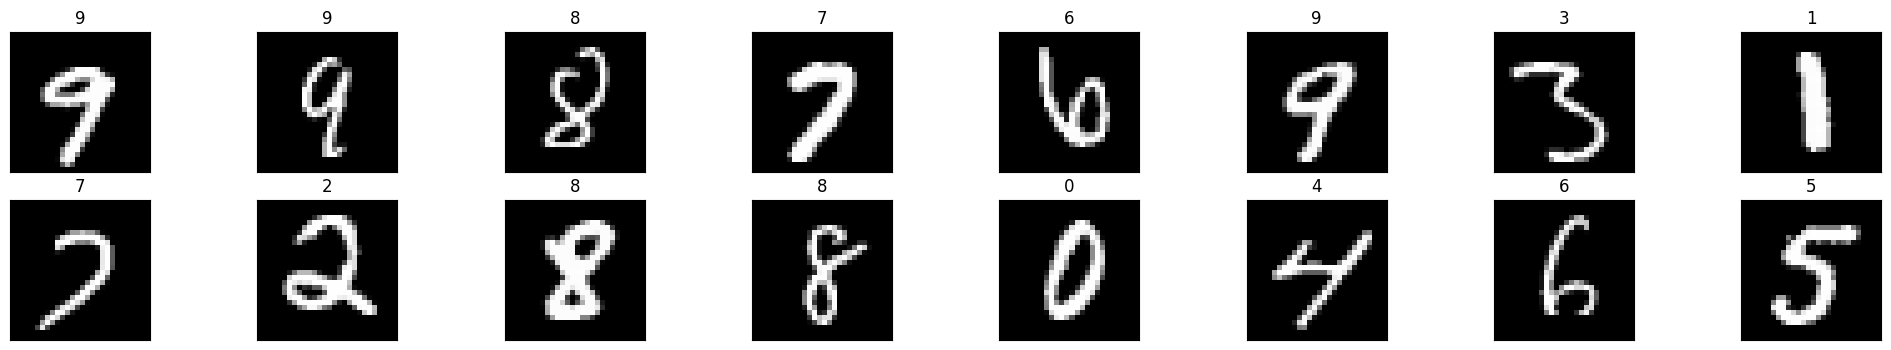

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
    
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [60]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self, num_features, num_classes, n_hidden_1):
        super().__init__()
        self.net = nn.Sequential( nn.Linear(num_features, n_hidden_1),
                        nn.ReLU(),
                        nn.Linear(n_hidden_1, num_classes),
                        nn.ReLU()
        )
    
    def forward (self, input):
        return self.net(input)


# initialize the NN
model = MLPModel(num_features, num_classes, n_hidden_1)
print(model)

MLPModel(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
    (3): ReLU()
  )
)


In [ ]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra


In [ ]:
def accuracy():
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # flatten ảnh
            images = images.view(images.size(0), -1)  
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


In [76]:
for inputs, labels in trainloader:
    print("Input shape:", inputs.shape)
    print("Label shape:", labels.shape)
    break
len(testloader)



Input shape: torch.Size([16, 28, 28])
Label shape: torch.Size([16])


625

In [136]:
def training (model, epochs, lr):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)
    losses = []

    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.view(inputs.size(0), -1)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        losses.append(running_loss)
        if epoch % 10 == 2:
            print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

    print('Finished Training')

In [120]:
training (model, 100, lr = 0.01)

Iteration: 1, accuracy: 91.670
Iteration: 2, accuracy: 90.620
Iteration: 3, accuracy: 93.610
Iteration: 4, accuracy: 94.760
Iteration: 5, accuracy: 94.810
Iteration: 6, accuracy: 94.450
Iteration: 7, accuracy: 94.570


KeyboardInterrupt: 

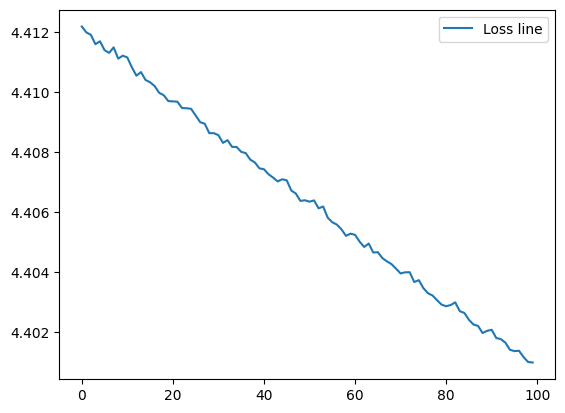

In [123]:
# Biểu đồ biểu diễn độ biến  thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## Bài tập

*   Tiến hành huấn luyện mô hình với số lượng epoch lần lượt là 50, 100, 150.Rút ra nhận xét.





*   Hiển thị một số kết quả



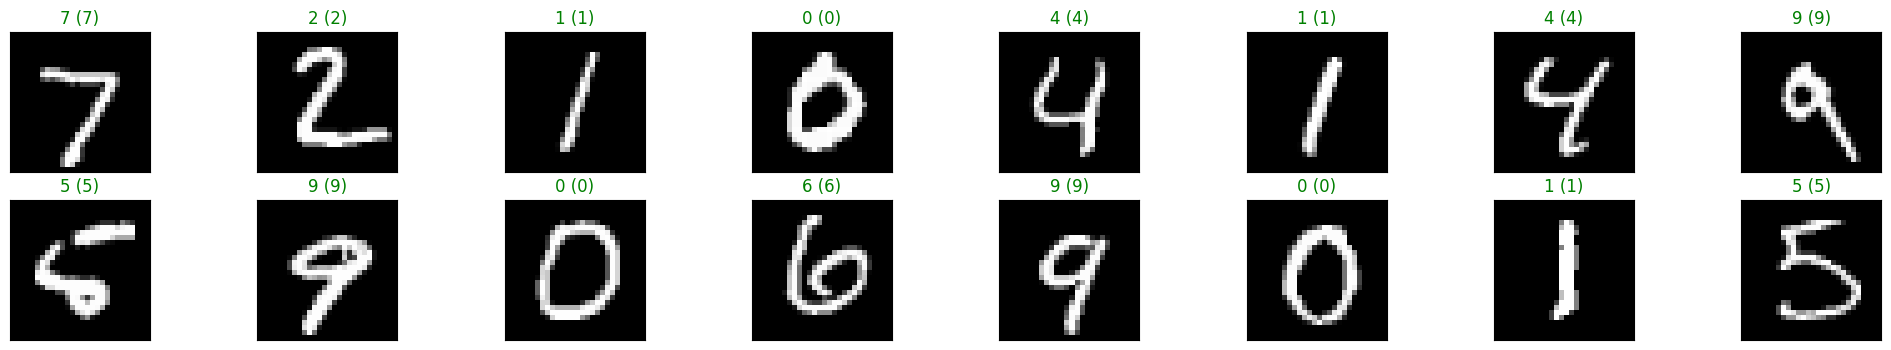

In [133]:

dataiter = iter(testloader)
images, labels = next(dataiter)
images_2d = images.numpy()  # (batch_size, 28, 28)


inputs = images.view(images.size(0), -1)
output = model(inputs)
_, preds = torch.max(output, 1)


fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images_2d[idx]), cmap='gray')  
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))
plt.show()


## Bài tập

*   Thiết lập thêm 3 mạng nơ ron với số tầng ẩn lần lượt là 3,5 (số lượng nơ ron của các tầng tùy ý). Với mỗi mạng mới được sinh ra, áp dụng learning-rate lần lượt bằng 0.1, 0,05, 0.001 để huấn luyện. Huấn luyện qua khoảng 100 epoch.
*   Chia tập train hiện có thành 2 phần. **85%** dữ liệu làm tập **train**, **15%** còn lại làm tập **dev**. Huấn luyện các mô hình tạo ra ở bước trên với tập **train** mới, sau đó kiểm thử trên tập **dev**. 
* Dùng các model kiểm thử trên tập **test**. So sánh model cho kết quả tốt nhất khi kiểm thử trên 2 tập này và rút ra nhận xét về vai trò của tập **dev**



In [137]:
class Net1(nn.Module):
    def __init__(self, num_features, num_classes, n_hidden_1, n_hidden_2, n_hidden_3):
        super().__init__()
        self.net = nn.Sequential( nn.Linear(num_features, n_hidden_1),
                                nn.ReLU(),
                                nn.Linear(n_hidden_1, n_hidden_2),
                                nn.ReLU(),
                                nn.Linear(n_hidden_2, n_hidden_3),
                                nn.ReLU(),
                                nn.Linear(n_hidden_3, num_classes),

        )
    
    def forward (self, input):
        return self.net(input)
    
class Net2(nn.Module):
    def __init__(self, num_features, num_classes, n_hidden_1, n_hidden_2, n_hidden_3, n_hidden_4, n_hidden_5):
        super().__init__()
        self.net = nn.Sequential( nn.Linear(num_features, n_hidden_1),
                        nn.Sigmoid(),
                        nn.Linear(n_hidden_1, n_hidden_2),
                        nn.Linear(n_hidden_2, n_hidden_3),
                        nn.Sigmoid(),
                        nn.Linear(n_hidden_3, n_hidden_4),
                        nn.Linear(n_hidden_4, n_hidden_5),
                        nn.Linear(n_hidden_5, num_classes),
                        nn.ReLU()
        )
    
    def forward (self, input):
        return self.net(input)

from sklearn.model_selection import train_test_split
# split traindataset into traindataset and dev dataset
trainloader = []
devloader = []

x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size = 0.15)

for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

for (i, j) in zip (x_dev, y_dev):
    devloader.append([i, j])
devloader = torch.utils.data.DataLoader(devloader, shuffle = False, batch_size= batch_size)

lrs = [0.1, 0.05, 0.001]




In [149]:
import copy
import torch
import torch.nn as nn
import torch.optim as optim

def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

def training(model, epochs, lr, trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        for inputs, labels in trainloader:
            inputs = inputs.view(inputs.size(0), -1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

def choosing_lr_param(model, lrs, trainloader, devloader):
    best_score = 0
    best_lr = None
    best_model = None

    for lr in lrs:
        print(f"\n🔹 Training with learning rate = {lr}")

        training(model, 100, lr, trainloader)
        acc = evaluate(model, devloader)
        print(f"Validation accuracy = {acc:.4f}")

        if acc > best_score:
            best_score = acc
            best_lr = lr
            best_model = copy.deepcopy(model)
    
    print(f"\n Best learning rate = {best_lr}, Validation accuracy = {best_score:}")
    return best_model, best_lr


In [150]:
net1 = Net1(num_features, num_classes, n_hidden_1, n_hidden_1//2, n_hidden_1//4)
net2 = Net2(num_features, num_classes, n_hidden_1, n_hidden_1//2, n_hidden_1//4, n_hidden_1//8, n_hidden_1//16)

best_net1, best_lr = choosing_lr_param(
    net1,
    lrs, 
    trainloader, 
    devloader
)

test_acc = evaluate(best_net1, testloader)
print(f"Test accuracy of best net1 = {test_acc:.4f}\n")

best_net2, best_lr = choosing_lr_param(
    net2,
    lrs, 
    trainloader, 
    devloader
)

test_acc = evaluate(best_net2, testloader)
print(f"Test accuracy of best net2 = {test_acc:.4f}")


🔹 Training with learning rate = 0.1
Validation accuracy = 0.9796

🔹 Training with learning rate = 0.05
Validation accuracy = 0.9797

🔹 Training with learning rate = 0.001
Validation accuracy = 0.9797

 Best learning rate = 0.05, Validation accuracy = 0.9796666666666667
Test accuracy of best net1 = 0.9811


🔹 Training with learning rate = 0.1
Validation accuracy = 0.0973

🔹 Training with learning rate = 0.05
Validation accuracy = 0.0973

🔹 Training with learning rate = 0.001
Validation accuracy = 0.0973

 Best learning rate = 0.1, Validation accuracy = 0.09733333333333333
Test accuracy of best net2 = 0.0980
